In [2]:
from fynesse import access, assess, address

from functools import partial

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd


In [3]:
from config import MODELS, EVENTS, SEEDS

## Data Clean-Up

In [4]:
model = 'resnet50'
seed = 42

for trial in [1, 2, 3, 4, 5]:
    for event in EVENTS:
        event_hash = address.hash(event)
        access.process(f'../experiments/results/rp/t{trial}/{model}_{event_hash}_s{seed}.txt', f'./data/csv/rp/t{trial}/{model}_{event_hash}_s{seed}.csv')


## Data Preprocessing

In [40]:
model = 'resnet50'
event = EVENTS[8]
seed = 42

master_list = list()

for trial in [1, 2, 3, 4]:
    event_hash = address.hash(event)
    df = access.load_df(f'./data/csv/rp/t{trial}/{model}_{event_hash}_s{seed}.csv')
    
    inferences = assess.extract_inferences(df)
    # master_list += list(map(partial(address.make_timeseries, event=event), inferences))
    master_list.append(address.make_timeseries(inferences[0], event=event))


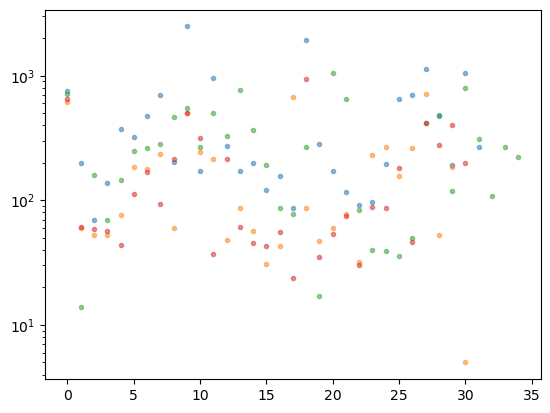

In [41]:
fig, ax = plt.subplots()

for timeseries in master_list:
    timeseries = address.aggregate(timeseries, bin_size=32)
    ax.scatter(np.arange(len(timeseries)), timeseries, marker='.', alpha=0.5)

ax.set_yscale('log')

plt.show()

In [ ]:
from sklearn.metrics import pairwise_distances

